<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Machine-learning-in-Football/blob/main/Model_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install git+https://github.com/statsbomb/statsbombpy.git;

  Cloning https://github.com/statsbomb/statsbombpy.git to /tmp/pip-req-build-wnp79pm2
  Running command git clone -q https://github.com/statsbomb/statsbombpy.git /tmp/pip-req-build-wnp79pm2
  Created wheel for statsbombpy: filename=statsbombpy-1.0-cp37-none-any.whl size=10764 sha256=175de67bd0dc83ea9f0582a44c5b638f236898c87a6d3ae09c65b64528539670
  Stored in directory: /tmp/pip-ephem-wheel-cache-eyjc103v/wheels/9f/02/d9/e55fe4d1650a0dd0ad7103b1766b971a167115c44ba5dba8fe
Successfully built statsbombpy


In [4]:
!wget https://github.com/Dinesh-Adhithya-H/sports-analytics/blob/master/deep_learning_passes.h5?raw=true
!wget https://github.com/Dinesh-Adhithya-H/Machine-learning-in-Football/blob/ced62fa01a33d569301fa379e15421c681c280ba/passes_dataset%20(1)%20(3).pkl

--2021-03-29 15:47:22--  https://github.com/Dinesh-Adhithya-H/sports-analytics/blob/master/deep_learning_passes.h5?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Dinesh-Adhithya-H/sports-analytics/raw/master/deep_learning_passes.h5 [following]
--2021-03-29 15:47:22--  https://github.com/Dinesh-Adhithya-H/sports-analytics/raw/master/deep_learning_passes.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dinesh-Adhithya-H/sports-analytics/master/deep_learning_passes.h5 [following]
--2021-03-29 15:47:22--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/sports-analytics/master/deep_learning_passes.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting 

In [5]:
from statsbombpy import sb

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import json
import seaborn as sns
import pickle
import networkx as nx
import tensorflow as tf

In [7]:
passes_model=tf.keras.models.load_model("/content/deep_learning_passes.h5?raw=true")

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
data=pd.read_pickle("/content/drive/My Drive/passes_dataset (1).pkl")
data=shuffle(data)
x=np.array(data[data["pass_outcome"]=="Incomplete"])[:,[0,1,3,4,5,6,7]]
x=np.append(x,np.array(data[data["pass_outcome"]=="Out"])[:,[0,1,3,4,5,6,7]],0)
p=np.array(data[data["pass_outcome"]=="Complete"].iloc[:173101])
X=np.append(x,p[:,[0,1,3,4,5,6,7]],0)
y=np.zeros(173101*2)
y[173101:]=1.0
xx=MinMaxScaler().fit(X)

In [11]:
data=pd.read_pickle("https://github.com/Dinesh-Adhithya-H/sports-analytics/blob/master/dribble_dataset.pkl?raw=true")
data=shuffle(data)

In [12]:
data

,location,dribble_outcome
3236,"[50.0, 59.0]",Incomplete
2909,"[100.0, 39.3]",Incomplete
3214,"[55.5, 5.6]",Complete
2614,"[105.0, 16.0]",Incomplete
3752,"[20.3, 35.2]",Complete
...,...,...
3664,"[62.3, 48.6]",Complete
3730,"[110.0, 3.0]",Incomplete
3625,"[70.5, 7.7]",Incomplete
3484,"[28.0, 31.0]",Complete


In [14]:
X=np.array(data["location"])
x=[]
for i in X:
  x.append(np.array(i))
x=np.array(x)
y_label=np.array(data["dribble_outcome"])
y=[]
for i in y_label:
  if i=="Complete":
    y.append(1.0)
  else:
    y.append(0.0)
y=np.array(y)
xx1=MinMaxScaler().fit(x)

In [15]:
!wget https://github.com/Dinesh-Adhithya-H/Machine-learning-in-Football/blob/main/dribble_deep_learning.h5?raw=true

--2021-03-29 15:54:50--  https://github.com/Dinesh-Adhithya-H/Machine-learning-in-Football/blob/main/dribble_deep_learning.h5?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Dinesh-Adhithya-H/Machine-learning-in-Football/raw/main/dribble_deep_learning.h5 [following]
--2021-03-29 15:54:50--  https://github.com/Dinesh-Adhithya-H/Machine-learning-in-Football/raw/main/dribble_deep_learning.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dinesh-Adhithya-H/Machine-learning-in-Football/main/dribble_deep_learning.h5 [following]
--2021-03-29 15:54:51--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Machine-learning-in-Football/main/dribble_deep_learning.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108

In [16]:
dribble_model=tf.keras.models.load_model("/content/dribble_deep_learning.h5?raw=true")

In [17]:
competitions=sb.competitions()

credentials were not supplied. open data access only


In [18]:
competitions

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,16,4,Europe,Champions League,male,2018/2019,2020-10-25T12:33:27.855343,2020-10-25T12:33:27.855343
1,16,1,Europe,Champions League,male,2017/2018,2021-01-23T21:55:30.425330,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,2016/2017,2020-08-26T12:33:15.869622,2020-07-29T05:00
3,16,27,Europe,Champions League,male,2015/2016,2020-08-26T12:33:15.869622,2020-07-29T05:00
4,16,26,Europe,Champions League,male,2014/2015,2020-08-26T12:33:15.869622,2020-07-29T05:00
5,16,25,Europe,Champions League,male,2013/2014,2020-08-26T12:33:15.869622,2020-07-29T05:00
6,16,24,Europe,Champions League,male,2012/2013,2020-08-26T12:33:15.869622,2020-07-29T05:00
7,16,23,Europe,Champions League,male,2011/2012,2020-08-26T12:33:15.869622,2020-07-29T05:00
8,16,22,Europe,Champions League,male,2010/2011,2020-07-29T05:00,2020-07-29T05:00
9,16,21,Europe,Champions League,male,2009/2010,2020-07-29T05:00,2020-07-29T05:00


In [19]:
sb.matches(competition_id=11,season_id=2)

credentials were not supplied. open data access only


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,last_updated,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
0,267212,2016-09-17,13:00:00.000,Spain - La Liga,2016/2017,Leganés,Barcelona,1,5,available,2020-07-29T05:00,4,Regular Season,Estadio Municipal de Butarque,R. De Burgos,1.1.0,2,2
1,266669,2016-09-10,20:30:00.000,Spain - La Liga,2016/2017,Barcelona,Deportivo Alavés,1,2,available,2020-07-29T05:00,3,Regular Season,Camp Nou,M. Melero,1.1.0,2,2
2,266892,2016-08-28,20:15:00.000,Spain - La Liga,2016/2017,Athletic Bilbao,Barcelona,0,1,available,2020-07-29T05:00,2,Regular Season,San Mamés Barria,Antonio Mateu,1.1.0,2,2
3,267220,2016-09-21,22:00:00.000,Spain - La Liga,2016/2017,Barcelona,Atlético Madrid,1,1,available,2020-07-29T05:00,5,Regular Season,Camp Nou,David Fernández,1.1.0,2,2
4,266989,2016-11-06,20:45:00.000,Spain - La Liga,2016/2017,Sevilla,Barcelona,1,2,available,2020-07-29T05:00,11,Regular Season,Estadio Ramón Sánchez Pizjuán,S. Jaime,1.1.0,2,2
5,267670,2016-08-20,18:15:00.000,Spain - La Liga,2016/2017,Barcelona,Real Betis,6,2,available,2020-07-29T05:00,1,Regular Season,Camp Nou,Alberto Undiano,1.1.0,2,2
6,266516,2017-01-29,12:00:00.000,Spain - La Liga,2016/2017,Real Betis,Barcelona,1,1,available,2020-07-29T05:00,20,Regular Season,Estadio Benito Villamarín,A. Hernández,1.1.0,2,2
7,266357,2016-12-10,13:00:00.000,Spain - La Liga,2016/2017,Osasuna,Barcelona,0,3,available,2020-07-29T05:00,15,Regular Season,Estadio El Sadar,J. Martínez,1.1.0,2,2
8,267039,2017-05-14,20:00:00.000,Spain - La Liga,2016/2017,Las Palmas,Barcelona,1,4,available,2020-07-29T05:00,37,Regular Season,Estadio de Gran Canaria,José González,1.1.0,2,2
9,267058,2016-10-29,20:45:00.000,Spain - La Liga,2016/2017,Barcelona,Granada,1,0,available,2020-07-29T05:00,10,Regular Season,Camp Nou,J. Martínez,1.1.0,2,2


In [20]:
match_ids=np.array(sb.matches(competition_id=11,season_id=2)["match_id"])

credentials were not supplied. open data access only


In [21]:
match_ids

array([267212, 266669, 266892, 267220, 266989, 267670, 266516, 266357,
       267039, 267058, 266477, 267101, 266440, 266033, 267660, 266273,
       267395, 266874, 266731, 266528, 266280, 267432, 267076, 267590,
       267373, 267077, 266952, 267464, 266299, 266191, 265952, 267492,
       267596, 267569])

In [65]:
data=sb.events(match_id=match_ids[22])

credentials were not supplied. open data access only


In [66]:
data["tactics"].iloc[0],data["tactics"].iloc[1]

({'formation': 433,
  'lineup': [{'jersey_number': 1,
    'player': {'id': 20055, 'name': 'Marc-André ter Stegen'},
    'position': {'id': 1, 'name': 'Goalkeeper'}},
   {'jersey_number': 20,
    'player': {'id': 6379, 'name': 'Sergi Roberto Carnicer'},
    'position': {'id': 2, 'name': 'Right Back'}},
   {'jersey_number': 3,
    'player': {'id': 5213, 'name': 'Gerard Piqué Bernabéu'},
    'position': {'id': 3, 'name': 'Right Center Back'}},
   {'jersey_number': 14,
    'player': {'id': 5506, 'name': 'Javier Alejandro Mascherano'},
    'position': {'id': 5, 'name': 'Left Center Back'}},
   {'jersey_number': 18,
    'player': {'id': 5211, 'name': 'Jordi Alba Ramos'},
    'position': {'id': 6, 'name': 'Left Back'}},
   {'jersey_number': 5,
    'player': {'id': 5203, 'name': 'Sergio Busquets i Burgos'},
    'position': {'id': 10, 'name': 'Center Defensive Midfield'}},
   {'jersey_number': 4,
    'player': {'id': 5470, 'name': 'Ivan Rakitić'},
    'position': {'id': 13, 'name': 'Right Cente

In [67]:
pd.unique(data["pass_outcome"])

array([nan, 'Incomplete', 'Out', 'Pass Offside', 'Unknown'], dtype=object)

In [68]:
data.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'block_deflection', 'block_offensive',
       'block_save_block', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_

In [84]:
x=data[data['possession_team']=="Real Madrid"][["possession","player","pass_angle","pass_end_location","location","pass_length","duration","pass_recipient","carry_end_location","dribble_outcome","type","pass_outcome",'shot_statsbomb_xg']]

In [85]:
pd.unique(x["type"])

array(['Pass', 'Ball Receipt*', 'Carry', 'Pressure', 'Dispossessed',
       'Duel', 'Ball Recovery', 'Miscontrol', 'Dribble', 'Interception',
       'Foul Committed', 'Foul Won', 'Block', 'Dribbled Past',
       'Clearance', 'Shot', 'Goal Keeper', '50/50', 'Substitution',
       'Tactical Shift', 'Bad Behaviour'], dtype=object)

In [71]:
x.dropna(inplace=True)

In [30]:
x1=data[data['possession_team']=="Barcelona"][["possession","player","location","carry_end_location"]]

In [31]:
x1.dropna(inplace=True)

In [32]:
x2=data[data['possession_team']=="Barcelona"][["possession","player","location","dribble_outcome"]]

In [33]:
x2.dropna(inplace=True)

In [86]:
max(np.array(x["possession"]))

198

In [87]:
x

,possession,player,pass_angle,pass_end_location,location,pass_length,duration,pass_recipient,carry_end_location,dribble_outcome,type,pass_outcome,shot_statsbomb_xg
6,2,Karim Benzema,2.927687,"[34.3, 46.8]","[61.0, 41.0]",27.322700,2.341699,Raphaël Varane,NaN,NaN,Pass,NaN,NaN
7,2,Raphaël Varane,-0.521263,"[96.1, 21.0]","[40.2, 53.1]",64.461000,3.112600,Cristiano Ronaldo dos Santos Aveiro,NaN,NaN,Pass,Incomplete,NaN
8,2,Gerard Piqué Bernabéu,-0.238744,"[43.8, 55.4]","[24.9, 60.0]",19.451735,2.748900,NaN,NaN,NaN,Pass,Incomplete,NaN
9,2,Mateo Kovačić,2.806856,"[74.9, 26.4]","[77.2, 25.6]",2.435159,0.506600,Luka Modrić,NaN,NaN,Pass,NaN,NaN
10,2,Luka Modrić,-1.589842,"[75.5, 5.4]","[75.9, 26.4]",21.003809,1.923700,Marcelo Vieira da Silva Júnior,NaN,NaN,Pass,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3972,136,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,Tactical Shift,NaN,NaN
3974,176,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,Tactical Shift,NaN,NaN
3975,194,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,Tactical Shift,NaN,NaN
3977,171,Luis Alberto Suárez Díaz,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,Bad Behaviour,NaN,NaN


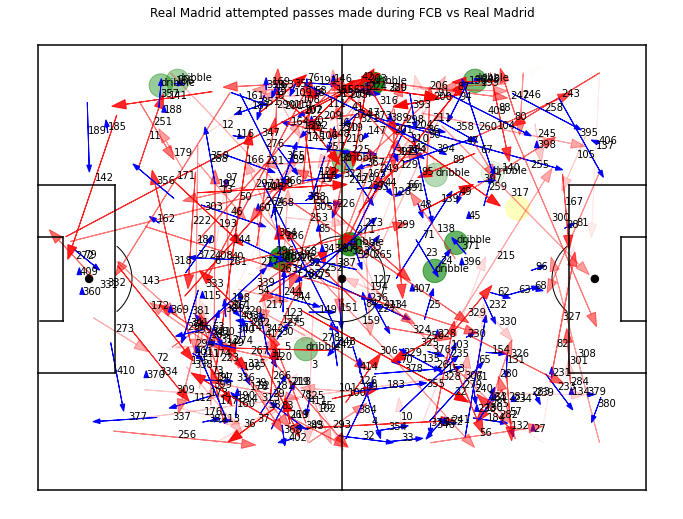

In [89]:
from matplotlib.patches import Arc

#Create figure
fig=plt.figure()
fig.set_size_inches(12,9)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,95], color="black")
plt.plot([0,130],[95,95], color="black")
plt.plot([130,130],[95,0], color="black")
plt.plot([130,0],[0,0], color="black")
plt.plot([65,65],[0,95], color="black")

#Left Penalty Area
plt.plot([16.5,16.5],[65,25],color="black")
plt.plot([0,16.5],[65,65],color="black")
plt.plot([16.5,0],[25,25],color="black")

#Right Penalty Area
plt.plot([130,113.5],[65,65],color="black")
plt.plot([113.5,113.5],[65,25],color="black")
plt.plot([113.5,130],[25,25],color="black")

#Left 6-yard Box
plt.plot([0,5.5],[54,54],color="black")
plt.plot([5.5,5.5],[54,36],color="black")
plt.plot([5.5,0.5],[36,36],color="black")

#Right 6-yard Box
plt.plot([130,124.5],[54,54],color="black")
plt.plot([124.5,124.5],[54,36],color="black")
plt.plot([124.5,130],[36,36],color="black")

#Prepare Circles
centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
centreSpot = plt.Circle((65,45),0.8,color="black")
leftPenSpot = plt.Circle((11,45),0.8,color="black")
rightPenSpot = plt.Circle((119,45),0.8,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

width=90
#Tidy Axes
plt.axis('off')

j=1
passes_timeline=[]

for p in range(0,max(np.array(x["possession"]))+1):
  for i in x[x["possession"]==p].index:
    try:
      if x.iloc[i]["type"]=="Pass":
        start=x.iloc[i]["location"]
        end=x.iloc[i]["pass_end_location"]
        val=passes_model.predict(xx.transform([[x.iloc[i]['pass_angle'],x.iloc[i]['pass_length'],x.iloc[i]['duration'],end[0],end[1],start[0],start[1]]]))
        plt.arrow(start[0],width-start[1],end[0]-start[0],-end[1]+start[1],alpha=10*val[0][1],label=str(j),color="red",head_width=2)
        plt.text(0.5*(start[0]+end[0]),0.5*(2*width-start[1]-end[1]),str(j))
        if str(x.iloc[i]["pass_outcome"])!="NaN":
          passes_timeline.append(val)
        else:
          passes_timeline.append(1-val)
        j+=1
      elif x.iloc[i]["type"]=="Carry":
        start=x.iloc[i]["location"]
        end=x.iloc[i]["carry_end_location"]
        plt.arrow(start[0],width-start[1],end[0]-start[0],-end[1]+start[1],head_width =1,label=str(j),color="blue")
        plt.text(0.5*(start[0]+end[0]),0.5*(2*width-start[1]-end[1]),str(j))
        j+=1
      elif x.iloc[i]["type"]=="Dribble":
        start=x.iloc[i]["location"]
        val=xx1.transform([start])
        c=plt.Circle((start[0],width-start[1]),2.5,alpha=3.5*dribble_model.predict(val)[0][1],color="green")
        ax.add_patch(c)
        plt.text(start[0],width-start[1],"dribble")
        plt.text(0.5*(start[0]),0.5*(width-start[1]),str(j))
        j+=1
      elif x.iloc[i]["type"]=="Shot":
        start=x.iloc[i]["location"]
        c=plt.Circle((start[0],width-start[1]),2.5,alpha=10.5*x.iloc[i]["shot_statsbomb_xg"],color="yellow")
        ax.add_patch(c)
    except IndexError:
      continue
plt.title("Real Madrid attempted passes made during FCB vs Real Madrid")
plt.show()

In [90]:
for i in range(1,len(passes_timeline)):
  passes_timeline[i]=passes_timeline[i]+passes_timeline[i-1]

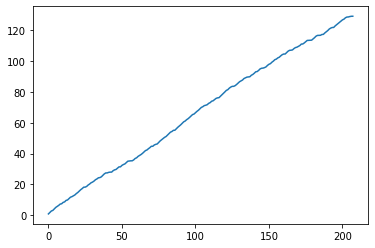

In [91]:
passes_timeline=np.array(passes_timeline)
plt.plot(passes_timeline[:,:,1])

In [19]:
data=sb.events(match_id=match_ids[0])
data=data[data["possession_team"]=="Barcelona"]
for i in range(len(pd.DataFrame(data.groupby(["possession"])))):
  possession_id=[]
  if len(pd.DataFrame(data.groupby(["possession"])).iloc[i][1]["shot_statsbomb_xg"].dropna())!=0:
    possession_id.append(i)
    print("Possession with shots",i)
    possession_data=pd.DataFrame(data.groupby(["possession"])).iloc[i][1]
    pass_data=pd.DataFrame(data.groupby(["possession"])).iloc[i][1][pd.DataFrame(data.groupby(["possession"])).iloc[i][1]["type"]=="Pass"].fillna("Complete")
    print(len(pass_data))
    print(pass_data[["player","pass_angle","pass_end_location","location","pass_length","duration","pass_recipient","pass_outcome"]])
    dribble_data=pd.DataFrame(data.groupby(["possession"])).iloc[i][1][pd.DataFrame(data.groupby(["possession"])).iloc[i][1]["type"]=="Dribble"]
    print(len(dribble_data))
    print(dribble_data[["player",'dribble_outcome','location']])

credentials were not supplied. open data access only
Possession with shots 15
8
                             player  ...  pass_outcome
174           Marc-André ter Stegen  ...      Complete
175  Lionel Andrés Messi Cuccittini  ...      Complete
176                    Ivan Rakitić  ...      Complete
177  Rafael Alcântara do Nascimento  ...      Complete
178           Gerard Piqué Bernabéu  ...      Complete
179        Luis Alberto Suárez Díaz  ...      Complete
180   Neymar da Silva Santos Junior  ...      Complete
181  Lionel Andrés Messi Cuccittini  ...    Incomplete

[8 rows x 8 columns]
1
                        player dribble_outcome      location
3120  Luis Alberto Suárez Díaz        Complete  [55.7, 34.9]
Possession with shots 16
3
                             player  ...  pass_outcome
190                    Ivan Rakitić  ...      Complete
191  Lionel Andrés Messi Cuccittini  ...      Complete
192        Luis Alberto Suárez Díaz  ...      Complete

[3 rows x 8 columns]
1
        